In [1]:
from sklearn import svm , datasets
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
db = datasets.load_iris()
x = db.data
y = db.target

In [7]:
x_train , x_test , y_train , y_test = train_test_split(x,y)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(112, 4) (112,) (38, 4) (38,)


In [9]:
algo = svm.SVC()
algo.fit(x_train, y_train)
#svc uses one vs one scheme in multiclass
#linearsvc uses one vs rest scheme

/home/abh1kudo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [11]:
print(algo.score(x_train,y_train))
print(algo.score(x_test,y_test))

0.9821428571428571
0.9473684210526315


In [12]:
# Now we will try to plot the decision boundary ... we need to make a grid 

def makegrid(x1, x2 , h=0.02):
    x1_min , x1_max = x1.min()-1 , x1.max()+1
    x2_min, x2_max = x2.min()-1 , x2.max()+1
    a = np.arange(x1_min, x1_max, h)
    b = np.arange(x2_min, x2_max, h)
    xx, yy = np.meshgrid(a,b)
    return xx, yy


In [20]:
#Since we can only see in 2D , hence we reduce dimensions of data
x = db.data[:,0:2]
y = db.target
x_train , x_test , y_train , y_test = train_test_split(x,y)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
algo = svm.SVC()
algo.fit(x_train, y_train)
print(algo.score(x_train,y_train))
print(algo.score(x_test,y_test))

(112, 2) (112,) (38, 2) (38,)
0.8571428571428571
0.7368421052631579


/home/abh1kudo/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [21]:
x1samp = np.array([1,3])
x2samp = np.array([2,5])
print(makegrid(x1samp , x2samp))

(array([[0.  , 0.02, 0.04, ..., 3.94, 3.96, 3.98],
       [0.  , 0.02, 0.04, ..., 3.94, 3.96, 3.98],
       [0.  , 0.02, 0.04, ..., 3.94, 3.96, 3.98],
       ...,
       [0.  , 0.02, 0.04, ..., 3.94, 3.96, 3.98],
       [0.  , 0.02, 0.04, ..., 3.94, 3.96, 3.98],
       [0.  , 0.02, 0.04, ..., 3.94, 3.96, 3.98]]), array([[1.  , 1.  , 1.  , ..., 1.  , 1.  , 1.  ],
       [1.02, 1.02, 1.02, ..., 1.02, 1.02, 1.02],
       [1.04, 1.04, 1.04, ..., 1.04, 1.04, 1.04],
       ...,
       [5.94, 5.94, 5.94, ..., 5.94, 5.94, 5.94],
       [5.96, 5.96, 5.96, ..., 5.96, 5.96, 5.96],
       [5.98, 5.98, 5.98, ..., 5.98, 5.98, 5.98]]))


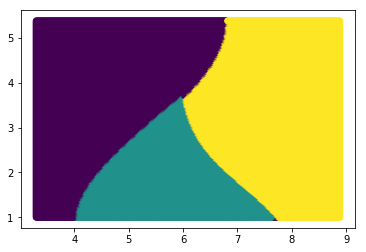

In [22]:
xx , yy = makegrid(x[:, 0], x[:, 1])
predictions = algo.predict(np.c_[xx.ravel(), yy.ravel()])
plt.scatter(xx.ravel(), yy.ravel(), c = predictions)
plt.show()

In [17]:
#Now we try Linear 
#Since we can only see in 2D , hence we reduce dimensions of data
x = db.data[:,0:2]
y = db.target
x_train , x_test , y_train , y_test = train_test_split(x,y)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
algo = svm.SVC(kernel = 'linear')
algo.fit(x_train, y_train)
print(algo.score(x_train,y_train))
print(algo.score(x_test,y_test))

(112, 2) (112,) (38, 2) (38,)
0.8035714285714286
0.9210526315789473


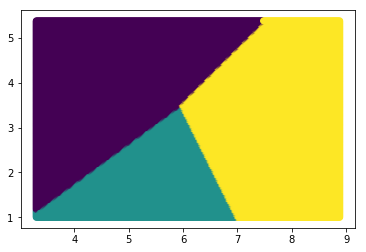

In [19]:
xx , yy = makegrid(x[:, 0], x[:, 1])
predictions = algo.predict(np.c_[xx.ravel(), yy.ravel()])
plt.scatter(xx.ravel(), yy.ravel(), c = predictions)
plt.show()